In [1]:
%load_ext autoreload
%autoreload 2

# Training multiple Learner with boosting

**Author:** [kkahloots](https://www.linkedin.com/in/kkahloots/)<br>
**Date created:** 2020/11/08<br>
**Last modified:** 2020/11/08<br>
**Description:** Performing learning as tasks by multiple learners.

## Setup


In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.1


## Generate a `Dataset`


In [3]:
image_size = (180, 180, 3)
batch_size = 36
validation_percentage=0.3
valid_format = 'jpg'
image_dir = "data/PetImages/train"
holdout_dir = 'data/PetImages/holdout'

In [20]:
from generators.from_images.file_image_generator import make_image_lists, get_generators

In [21]:
imgs_list = make_image_lists(
    image_dir=image_dir, 
    validation_pct=validation_percentage, 
    valid_imgae_formats=valid_format
)

  DEBUG    | Looking for images in 'Cat'
  INFO     | 10573 file found
  DEBUG    | Looking for images in 'Dog'
  INFO     | 10506 file found


In [22]:
holdout_list = make_image_lists(
    image_dir=holdout_dir, 
    validation_pct=0.0, 
    valid_imgae_formats=valid_format
)

  DEBUG    | Looking for images in 'Cat'
  INFO     | 1175 file found
  DEBUG    | Looking for images in 'Dog'
  INFO     | 1168 file found


In [23]:
train_generator, validation_generator, holdout_generator = \
                                    get_generators(
                                                    images_list=imgs_list, 
                                                    image_dir=image_dir,
                                                    holdout_dir=holdout_dir,
                                                    holdout_list=holdout_list,
                                                    image_size=image_size, 
                                                    batch_size=batch_size, 
                                                    class_mode='binary',
                                                    rotation_range=40,
                                                    width_shift_range=0.2,
                                                    height_shift_range=0.2,
                                                    shear_range=0.2,
                                                    zoom_range=0.2,
                                                    horizontal_flip=True,
                                                    fill_mode='nearest',
                                                    return_filename=True
                                                                    )

  INFO     | Found 21009 training files
  INFO     | Found 70 validation files
  INFO     | Found 2343 training files


In [ ]:
    x=train_ds, 
    epochs=epochs, 
    steps_per_epoch=10,
    callbacks=callbacks, 
    validation_data=val_ds, 
    validation_steps=10,
    workers=-1,
    use_multiprocessing=True,
    verbose=1

In [ ]:
def boosted_training(X, 
                     epochs, 
                     steps_per_epoch, 
                     callbacks, 
                     validation_data,
                     learning_rate=1
                     n_estimators=50,
                    ):
    """Build a boosted classifier/regressor from the training set (X, y).
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The training input samples. Sparse matrix can be CSC, CSR, COO,
        DOK, or LIL. COO, DOK, and LIL are converted to CSR.

    Returns
    -------
    self : object
    """
    # Check parameters
    if learning_rate <= 0:
        raise ValueError("learning_rate must be greater than zero")


    #sample_weight = _check_sample_weight(sample_weight, X, np.float64)
    #sample_weight /= sample_weight.sum()
    #if np.any(sample_weight < 0):
    #    raise ValueError("sample_weight cannot contain negative weights")


    # Clear any previous fit results
    estimators_ = []
    estimator_weights_ = np.zeros(n_estimators, dtype=np.float64)
    estimator_errors_ = np.ones(n_estimators, dtype=np.float64)


    for iboost in range(n_estimators):
        # Boosting step
        sample_weight, estimator_weight, estimator_error = _boost(
                                                                    iboost,
                                                                    X,
                                                                    sample_weight,
                                                                    random_state
                                                                    )

        # Early termination
        if sample_weight is None:
            break

        estimator_weights_[iboost] = estimator_weight
        estimator_errors_[iboost] = estimator_error

        # Stop if error is zero
        if estimator_error == 0:
            break

        sample_weight_sum = np.sum(sample_weight)

        # Stop if the sum of sample weights has become non-positive
        if sample_weight_sum <= 0:
            break

        if iboost < self.n_estimators - 1:
            # Normalize
            sample_weight /= sample_weight_sum

    return self


In [293]:
from builder.boosting import AdaBoostClassifier

In [ ]:
cls = AdaBoostClassifier(base_estimator=, 
                         n_estimators=100, 
                         random_state=0)

In [294]:
from learner_building import make_learner

In [ ]:
make_learner(model_name='learner01', input_shape=image_size, num_classes=2)

In [ ]:

def take2(gen):
    while True:
        batch = next(gen)
        yield batch[0], batch[1]

In [47]:

def take2(gen):
    while True:
        batch = next(gen)
        yield batch[0], batch[1]

In [58]:
train_ds = tf.data.Dataset.from_generator(
    lambda: take2(train_generator), 
    output_types= (tf.float32, tf.float32)
)

val_ds = tf.data.Dataset.from_generator(
    lambda: take2(validation_generator), 
    output_types= (tf.float32, tf.float32)
)

holdout_ds = tf.data.Dataset.from_generator(
    lambda: take2(holdout_generator), 
    output_types= (tf.float32, tf.float32)
)

## Build a model


In [59]:
from learner_building import make_learner

In [60]:
learner = make_learner(model_name='learner01', input_shape=image_size, num_classes=2)

Model: "learner01"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
dense_10 (Dense)             (None, 180, 180, 100)     400       
_________________________________________________________________
dense_11 (Dense)             (None, 180, 180, 100)     10100     
_________________________________________________________________
dense_12 (Dense)             (None, 180, 180, 100)     10100     
_________________________________________________________________
dense_13 (Dense)             (None, 180, 180, 3)       303       
_________________________________________________________________
flatten_2 (Flatten)          (None, 97200)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 97

In [86]:
tf.keras.utils.plot_model?

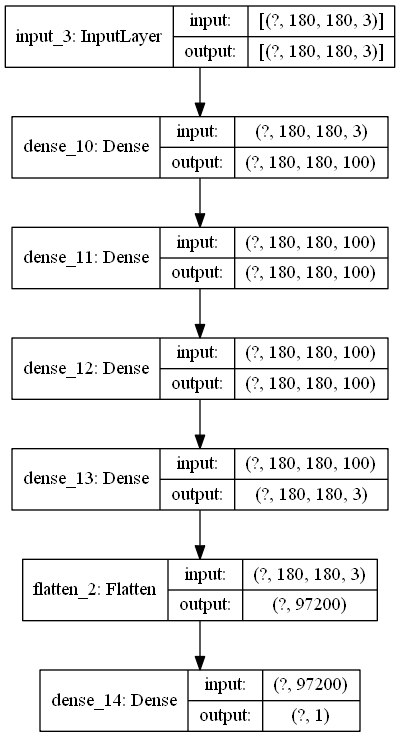

In [87]:
tf.keras.utils.plot_model(learner, to_file='learner.png', show_shapes=True)

## Train the learner


In [62]:
from tensorflow_addons.optimizers import RectifiedAdam

In [63]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val-loss', 
    min_delta=1e-9, 
    patience=6, 
    verbose=1, 
    restore_best_weights=False
)

In [64]:
learner_sp = f"experiments/{learner.name}.hdf5"
ms =  tf.keras.callbacks.ModelCheckpoint(filepath=learner_sp, 
                                            verbose=1, 
                                            save_best_only=True)

In [65]:
from livelossplot import PlotLossesKeras

In [66]:
epochs = 10 #int(1e9)
loss_fn = tf.losses.binary_crossentropy
metrics=[tf.metrics.BinaryAccuracy()]

callbacks = [es, ms, PlotLossesKeras()]

learner.compile(
    optimizer=RectifiedAdam(),
    loss=loss_fn,
    metrics=metrics
)



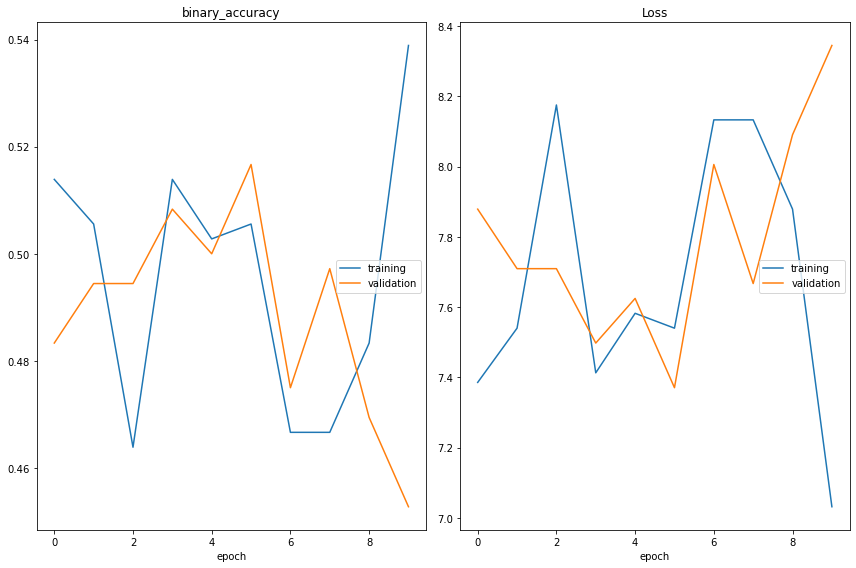

binary_accuracy
	training         	 (min:    0.464, max:    0.539, cur:    0.539)
	validation       	 (min:    0.453, max:    0.517, cur:    0.453)
Loss
	training         	 (min:    7.032, max:    8.175, cur:    7.032)
	validation       	 (min:    7.370, max:    8.345, cur:    8.345)
10/10 [==============================] - 10s 1s/step - loss: 7.0316 - binary_accuracy: 0.5389 - val_loss: 8.3447 - val_binary_accuracy: 0.4528


In [67]:
learner.fit(
    x=train_ds, 
    epochs=epochs, 
    steps_per_epoch=10,
    callbacks=callbacks, 
    validation_data=val_ds, 
    validation_steps=10,
    workers=-1,
    use_multiprocessing=True,
    verbose=1
)

In [71]:
del learner

In [291]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

## Evaluate the learner on training, validation and holdout dataset

Note that data augmentation and dropout are inactive at inference time.


In [72]:
learner = tf.keras.models.load_model(filepath=learner_sp, compile=False)

In [74]:
from tqdm import tqdm
import numpy as np

In [78]:
loss_fn = tf.losses.binary_crossentropy

In [232]:
eval_epoch=10
momory_file = 'memory/learner_tracing.csv'
col_names = ['filename', 'learner', 'score']

In [233]:
from memory.memory_manager import insert

In [252]:
import pandas as pd

In [270]:
memory_file = pd.DataFrame(columns=col_names)

In [271]:
#insert(filename= filename[0].replace('\\', '/'), learner=learner.name, score=loss_value.numpy())

In [272]:
for ep in tqdm(range(eval_epoch)):
    images, labels, filenames = next(train_generator)
    loss_values = loss_fn(labels, learner.predict(images))
    for filename, loss_value in zip(filenames.values(), loss_values):
        record = {'filename': filename[0].replace('\\', '/'), 'learner':learner.name, 'score': loss_value.numpy()}
        ix = 0 if pd.isnull(memory_file.index.max()) else memory_file.index.max()
        memory_file.loc[ix+1] = record.values()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.84it/s]


In [280]:
memory_file.head()

,filename,learner,score
1,data/PetImages/train/Dog/1765.jpg,learner01,8.518467
2,data/PetImages/train/Cat/6985.jpg,learner01,8.518467
3,data/PetImages/train/Cat/252.jpg,learner01,8.518467
4,data/PetImages/train/Dog/9990.jpg,learner01,8.518467
5,data/PetImages/train/Cat/1150.jpg,learner01,8.518467


In [279]:
e = '1'
memory_file.to_csv(f'memory/learner_tracing{e}.csv', index=False, mode='a')

In [215]:
import pandas as pd
memory_file = pd.read_csv(filepath_or_buffer=momory_file, names=col_names)

In [216]:
print(memory_file.shape)

(36000, 3)


In [217]:
memory_file.head()

,filename,learner,score
0,data/PetImages/train/Cat/9777.jpg,learner01,9.370313
1,data/PetImages/train/Dog/606.jpg,learner01,9.370313
2,data/PetImages/train/Dog/436.jpg,learner01,9.370313
3,data/PetImages/train/Cat/4515.jpg,learner01,9.370313
4,data/PetImages/train/Cat/5214.jpg,learner01,9.370313


In [281]:
files_score = memory_file.groupby(['filename', 'learner'])['score'].mean().to_frame().reset_index()


In [284]:
files_score[files_score['filename'] =="data/PetImages/train/Cat/11206.jpg"]

,filename,learner,score
0,data/PetImages/train/Cat/11206.jpg,learner01,8.518467


In [287]:
files_score['score'].min()

5.962926387786865

In [221]:
def ds2itr(ds):
    while True:
        try:
            for data in ds:
                yield data
        except StopIteration as e:
            pass
        

In [47]:
def take2(gen):
    while True:
        batch = next(gen)
        yield batch[0], batch[1]

In [ ]:
tf.data.Dataset.from_tensors

In [58]:
train_ds = tf.data.Dataset.from_generator(
    lambda: take2(train_generator), 
    output_types= (tf.float32, tf.float32)
)

val_ds = tf.data.Dataset.from_generator(
    lambda: take2(validation_generator), 
    output_types= (tf.float32, tf.float32)
)

holdout_ds = tf.data.Dataset.from_generator(
    lambda: take2(holdout_generator), 
    output_types= (tf.float32, tf.float32)
)

In [81]:
ds = ds2itr(train_ds)
train_loss_scores = {}
train_loss_score = []
for ep in tqdm(range(eval_epoch)):
    batch = next(ds)
    train_loss_value = loss_fn(batch[1], learner.predict(batch[0]) )
    train_loss_score += [train_loss_value]
train_loss_scores = {loss_fn.__name__: train_loss_score}   

train_loss_scores = {k: {'min': 
                          tf.math.reduce_min([*val][0], axis=0).numpy(), 
                          'max':
                          tf.math.reduce_max([*val][0], axis=0).numpy(), 
                          'std': 
                          tf.math.reduce_std([*val][0], axis=0).numpy(), 
                          'mean': 
                          tf.math.reduce_mean([*val][0], axis=0).numpy() } for k, val in train_loss_scores.items()} 


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.10it/s]


In [82]:
ds = ds2itr(val_ds)
val_loss_scores = {}
val_loss_score = []
for ep in tqdm(range(eval_epoch)):
    batch = next(ds)
    val_loss_value = loss_fn(batch[1], learner.predict(batch[0]) )
    val_loss_score += [val_loss_value]
val_loss_scores = {loss_fn.__name__: val_loss_score}   

val_loss_scores = {k: {'min': 
                          tf.math.reduce_min([*val][0], axis=0).numpy(), 
                          'max':
                          tf.math.reduce_max([*val][0], axis=0).numpy(), 
                          'std': 
                          tf.math.reduce_std([*val][0], axis=0).numpy(), 
                          'mean': 
                          tf.math.reduce_mean([*val][0], axis=0).numpy() } for k, val in val_loss_scores.items()} 


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.16it/s]


In [83]:
print('train loss', train_loss_scores)
print('val loss',val_loss_scores)

train loss {'binary_crossentropy': {'min': 7.2406964, 'max': 7.2406964, 'std': 0.0, 'mean': 7.2406964}}
val loss {'binary_crossentropy': {'min': 7.6666193, 'max': 7.6666193, 'std': 0.0, 'mean': 7.6666193}}


In [ ]:
decision = lambda x: 1 if x > 0.5 else 0

In [ ]:
ds = ds2itr(train_ds)
mertics_score = {}
for metric, metric_fn in mertics_dict.items():
    train_metric_scores = {}
    train_metric_score = []
    for ep in tqdm(range(eval_epoch)):
        batch = next(ds)
        pred = np.array([[decision(p)] for p in learner.predict(batch[0])])
        train_metric_value = metric_fn(batch[1], pred)
        train_metric_score += [train_metric_value]
    train_metric_scores = {metric: train_metric_score}   

    train_metric_scores = {k: {'min': 
                              tf.math.reduce_min([*val], axis=0).numpy(), 
                              'max':
                              tf.math.reduce_max([*val], axis=0).numpy(), 
                              'std': 
                              tf.math.reduce_std([*val], axis=0).numpy(), 
                              'mean': 
                              tf.math.reduce_mean([*val], axis=0).numpy() } for k, val in train_metric_scores.items()} 
   
    mertics_score.update(train_metric_scores)

In [ ]:
ds = ds2itr(val_ds)
mertics_score = {}
for metric, metric_fn in mertics_dict.items():
    val_metric_scores = {}
    val_metric_score = []
    for ep in tqdm(range(eval_epoch)):
        batch = next(ds)
        pred = np.array([[decision(p)] for p in learner.predict(batch[0])])
        val_metric_value = metric_fn(batch[1], pred)
        val_metric_score += [val_metric_value]
    val_metric_scores = {metric: val_metric_score}   

    val_metric_scores = {k: {'min': 
                              tf.math.reduce_min([*val], axis=0).numpy(), 
                              'max':
                              tf.math.reduce_max([*val], axis=0).numpy(), 
                              'std': 
                              tf.math.reduce_std([*val], axis=0).numpy(), 
                              'mean': 
                              tf.math.reduce_mean([*val], axis=0).numpy() } for k, val in val_metric_scores.items()} 
   
    mertics_score.update(val_metric_scores)

In [ ]:
ds = ds2itr(holdout_ds)
mertics_score = {}
for metric, metric_fn in mertics_dict.items():
    holdout_metric_scores = {}
    holdout_metric_score = []
    for ep in tqdm(range(eval_epoch)):
        batch = next(ds)
        pred = np.array([[decision(p)] for p in learner.predict(batch[0])])
        holdout_metric_value = metric_fn(batch[1], pred)
        holdout_metric_score += [holdout_metric_value]
    holdout_metric_scores = {metric: holdout_metric_score}   

    holdout_metric_scores = {k: {'min': 
                              tf.math.reduce_min([*val], axis=0).numpy(), 
                              'max':
                              tf.math.reduce_max([*val], axis=0).numpy(), 
                              'std': 
                              tf.math.reduce_std([*val], axis=0).numpy(), 
                              'mean': 
                              tf.math.reduce_mean([*val], axis=0).numpy() } for k, val in holdout_metric_scores.items()} 
   
    mertics_score.update(holdout_metric_scores)

In [ ]:
print('train metric', train_metric_scores)
print('val metric',val_metric_scores)
print('holdout metric', holdout_metric_scores)

## Visualize the last layer

In [ ]:
learner = tf.keras.models.load_model(filepath=learner_sp, compile=False)

In [ ]:
learner.summary()

In [ ]:
learner.layers[-3]

In [ ]:
image_size

In [ ]:
x = tf.keras.layers.Reshape(image_size)(learner.layers[-3].output)

In [ ]:
model2 = tf.keras.Model(inputs=learner.inputs, outputs=[x])
model2.summary()

In [ ]:
ds = ds2itr(val_ds)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
images = next(ds)[0]

In [ ]:
images.shape

In [ ]:
Image.fromarray((images[0].numpy()* 255.0).astype(np.uint8), mode='RGB')

In [ ]:
predictions = model2.predict(images)

In [ ]:
Image.fromarray((predictions[0] * 255.0).astype(np.uint8), mode='RGB')

In [ ]:
from utils.reporting.ploting import plot_and_save_generated

In [ ]:
plot_and_save_generated(images.numpy(), epoch=999, path='.', gray=False, save=False)

In [ ]:
plot_and_save_generated( [Image.fromarray((img * 255.0).astype(np.uint8), mode='RGB') for img in predictions], epoch=999, path='.', gray=False, save=False)